## Capstone Exercise

We are going to import the libraries required to work with and analyze the results by including the following commands.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


We will read in the first csv file using the pandas library and assign the result to a variable named “df_greenbonds”.

In [2]:
df_greenbonds = pd.read_csv('Green_Bonds_since_2008.csv')

To validate all the records have loaded successfully, we run a shape() function against the DataFrame.

In [3]:
df_greenbonds.shape

(115, 10)

To preview the DataFrame, we run a head() function

In [4]:
df_greenbonds.head()

,Type,Maturity,Currency,Volume,Coupon,Settlement Date,Maturity Date,USD Equivalent,ISIN,Final Terms
0,Green,5,INR,80000000,0.04500,04/05/2018 12:00:00 AM,03/24/2023 12:00:00 AM,1230000,XS1801822419,NaN
1,Green,5,INR,80000000,0.04050,11/28/2017 12:00:00 AM,11/28/2022 12:00:00 AM,1230000,XS1724511958,NaN
2,Green,5,INR,1608700000,0.05000,09/27/2017 12:00:00 AM,NaN,25100000,XS1687324068,http://pubdocs.worldbank.org/en/20621154455317...
3,Green,3,MYR,65000000,0.02950,03/13/2017 12:00:00 AM,03/13/2020 12:00:00 AM,14620000,XS1576723552,http://pubdocs.worldbank.org/en/30221154455317...
4,Green,3,USD,100000000,0.01181,11/14/2016 12:00:00 AM,12/15/2019 12:00:00 AM,100000000,XS1517268105,NaN


We will read in the second csv file using the pandas library and assign the result to a variable named “df_fx_rates”.

In [5]:
df_fx_rates = pd.read_csv('ECB_FX_USD-quote.csv')

To validate all the records have loaded successfully, we run a shape() function against the DataFrame.

In [7]:
df_fx_rates.shape

(5464, 34)

To preview the DataFrame, we run a head() function

In [8]:
df_fx_rates.head()

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
0,#date,#value+eur,#value+jpy,#value+bgn,#value+czk,#value+dkk,#value+gbp,#value+huf,#value+pln,#value+ron,...,#value+ils,#value+inr,#value+krw,#value+mxn,#value+myr,#value+nzd,#value+php,#value+sgd,#value+thb,#value+zar
1,2020-05-07,1.0783,0.009383865633974415,0.5513344922793741,0.03970469106708888,0.14453454862274648,1.2326527812707195,0.0030865010304556902,0.23716101788110056,0.2235513631180678,...,0.28465457617275153,0.013187229801207066,0.0008167825599539457,0.04136536786904867,0.23124101992236926,0.6051066217732884,0.01978641026111529,0.7046330784813436,0.03083588321084389,0.053727491056213814
2,2020-05-06,1.0807,0.009426079372001744,0.5525616116167297,0.04004520695149517,0.1448310059235037,1.2385820544852326,0.003091335564518436,0.23807111071947837,0.22405821740302284,...,0.2850398269768423,0.013182242335160983,0.0008165593737721764,0.04148799355049235,0.23134887504549057,0.6058075004204272,0.019785792749908458,0.7047277469840234,0.030873614444063537,0.0538725741888207
3,2020-05-05,1.0843,0.009370840895341804,0.5544022906227631,0.04019200830306175,0.14532514876963493,1.2454628991500114,0.0030956119564907072,0.23927531114838027,0.22467882304185663,...,0.2839001911345011,0.013200070608143067,0.0008184569862848258,0.041889124975854744,0.23231349359386383,0.6054159687325517,0.01976377522191641,0.7059704407839053,0.03086887206058191,0.05448250911977811
4,2020-05-04,1.0942,0.00936494351249572,0.5594641578893548,0.04034809543124747,0.14663236042990002,1.244851987531002,0.0030973476377841314,0.23959884382937727,0.22622394971882237,...,0.28361110391125166,0.013217050986265959,0.0008165671641791045,0.04069745817556963,0.2316944056240207,0.6050987114969861,0.01975839217031727,0.7061632784769281,0.030912224199790946,0.053657244855926725


Since we know from the prior chapters that data is inherently messy and requires some cleanup, we will delete first row because it contains hdx hashtag metadata values not required in our analysis.

In [9]:
df_fx_rates = df_fx_rates.drop(0)
df_fx_rates.head()

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
1,2020-05-07,1.0783,0.009383865633974415,0.5513344922793741,0.03970469106708888,0.14453454862274648,1.2326527812707195,0.0030865010304556902,0.23716101788110056,0.2235513631180678,...,0.28465457617275153,0.013187229801207066,0.0008167825599539457,0.04136536786904867,0.23124101992236926,0.6051066217732884,0.01978641026111529,0.7046330784813436,0.03083588321084389,0.053727491056213814
2,2020-05-06,1.0807,0.009426079372001744,0.5525616116167297,0.04004520695149517,0.1448310059235037,1.2385820544852326,0.003091335564518436,0.23807111071947837,0.22405821740302284,...,0.2850398269768423,0.013182242335160983,0.0008165593737721764,0.04148799355049235,0.23134887504549057,0.6058075004204272,0.019785792749908458,0.7047277469840234,0.030873614444063537,0.0538725741888207
3,2020-05-05,1.0843,0.009370840895341804,0.5544022906227631,0.04019200830306175,0.14532514876963493,1.2454628991500114,0.0030956119564907072,0.23927531114838027,0.22467882304185663,...,0.2839001911345011,0.013200070608143067,0.0008184569862848258,0.041889124975854744,0.23231349359386383,0.6054159687325517,0.01976377522191641,0.7059704407839053,0.03086887206058191,0.05448250911977811
4,2020-05-04,1.0942,0.00936494351249572,0.5594641578893548,0.04034809543124747,0.14663236042990002,1.244851987531002,0.0030973476377841314,0.23959884382937727,0.22622394971882237,...,0.28361110391125166,0.013217050986265959,0.0008165671641791045,0.04069745817556963,0.2316944056240207,0.6050987114969861,0.01975839217031727,0.7061632784769281,0.030912224199790946,0.053657244855926725
5,2020-04-30,1.0876,0.009386381289376024,0.5560895797116269,0.04013728457024762,0.14582216024884692,1.2514815027904032,0.003083465638466772,0.2398976530792306,0.22456690962400114,...,0.28569177020672987,0.01332666754890284,0.0008282752895841108,0.0421627195651921,0.2325571449954027,0.614289748658571,0.019856861169940846,0.7097363612633777,0.030883689232167194,0.05532832753393158


For our analysis, we want to focus on the latest FX Rate available in the file. You could take the first row available in the DataFrame however a more robust method would be to use the max() function so how the data is sorted becomes irrelevant.  To verify the correct value will work before we filter the DataFrame, use this command.

In [10]:
df_fx_rates['Date'].max()

'2020-05-07'

From the prior step, we are confident that our filter will use the correct Date value, so we will create a new DataFrame with only one the specific date value so we can join the results in later steps. The new DataFrame is named “df_fx_rates_max_date” and is a result of filtering the original DataFrame named “df_fx_rates” by the “Date” field where only the calculated max Date value will be returned.  We add a head() function to validate the results in the Notebook.

In [11]:
df_fx_rates_max_date = df_fx_rates[df_fx_rates.Date==df_fx_rates['Date'].max()]

In [12]:
df_fx_rates_max_date.head()

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
1,2020-05-07,1.0783,0.009383865633974415,0.5513344922793741,0.03970469106708888,0.14453454862274648,1.2326527812707195,0.0030865010304556902,0.23716101788110056,0.2235513631180678,...,0.28465457617275153,0.013187229801207066,0.0008167825599539457,0.04136536786904867,0.23124101992236926,0.6051066217732884,0.01978641026111529,0.7046330784813436,0.03083588321084389,0.053727491056213814


We still have more work to do in order to join this data to our original Bond DataFrame. We need to transform it using the transpose() function which will change all the columns into rows.  In other technologies, this concept is called a pivot, crosstab or crosstable.  The results are stored in a new DataFrame called “df_reates_transposed”.  We rename the columns to make it easier to work with along with running a head() command to preview the results.

In [13]:
df_rates_transposed = df_fx_rates_max_date.transpose()
df_rates_transposed.columns.name = 'Currency'
df_rates_transposed.columns = ['Currency_Value']
df_rates_transposed.head(10)

,Currency_Value
Date,2020-05-07
EUR,1.0783
JPY,0.009383865633974415
BGN,0.5513344922793741
CZK,0.03970469106708888
DKK,0.14453454862274648
GBP,1.2326527812707195
HUF,0.0030865010304556902
PLN,0.23716101788110056
RON,0.2235513631180678


We are very close to having our reference table available with all the FX Rates by Currency formatted correctly but we notice on the first row in Figure 14 that the “Date” value is mixed in with our Currencies. This might be an extra step in the process but the need to have conformed and consistent data values represented in structured data has been reinforced throughout the book so let’s clean up the DataFrame by dropping the “Date” record.  We also use the reindex() function to make it easier to join in the next step and then run the head() command to verify the results.

In [14]:
df_rates_transposed = df_rates_transposed.drop('Date')
df_rates_transposed = df_rates_transposed.reindex()
df_rates_transposed.head()

,Currency_Value
EUR,1.0783
JPY,0.009383865633974415
BGN,0.5513344922793741
CZK,0.03970469106708888
DKK,0.14453454862274648


We are now ready to join the transformed and cleaned FX Rates into our original Bonds source using the common “Currency” join key field. Because we want all the records from the “df_greenbonds” source and only the matching values from the “df_rates_transposed”, we use a left join.  To display and verify the results, we use the head() command.

In [15]:
df_greenbonds_revised = df_greenbonds.merge(df_rates_transposed, how='left', left_on='Currency', right_index=True)
df_greenbonds_revised.head()

,Type,Maturity,Currency,Volume,Coupon,Settlement Date,Maturity Date,USD Equivalent,ISIN,Final Terms,Currency_Value
0,Green,5,INR,80000000,0.04500,04/05/2018 12:00:00 AM,03/24/2023 12:00:00 AM,1230000,XS1801822419,NaN,0.013187229801207066
1,Green,5,INR,80000000,0.04050,11/28/2017 12:00:00 AM,11/28/2022 12:00:00 AM,1230000,XS1724511958,NaN,0.013187229801207066
2,Green,5,INR,1608700000,0.05000,09/27/2017 12:00:00 AM,NaN,25100000,XS1687324068,http://pubdocs.worldbank.org/en/20621154455317...,0.013187229801207066
3,Green,3,MYR,65000000,0.02950,03/13/2017 12:00:00 AM,03/13/2020 12:00:00 AM,14620000,XS1576723552,http://pubdocs.worldbank.org/en/30221154455317...,0.23124101992236926
4,Green,3,USD,100000000,0.01181,11/14/2016 12:00:00 AM,12/15/2019 12:00:00 AM,100000000,XS1517268105,NaN,NaN


An advantage of constantly running the head() command to validate results in each step is you can make observations about the data as you prepare and clean it further analysis. In Figure 16, we see a null() in the “Currency_Value” which is displayed as “NaN’.  The is a result of the left join and expected because there was no value of “USD” in the FX Rates source data.  This makes sense because you don’t need to convert the Currency of USD but will have an impact when we attempt to create calculations from the values in this column.  The solution in this case is to just convert all the “NaN” values to 1 because the FX Rate conversion for USD is one.  There will be no output after running this command.

In [16]:
df_greenbonds_revised["Currency_Value"].fillna(1, inplace=True)

Working with data now for multiple chapters, you realize the importance of having consistent data types. Because our sources are CSV, the defined type for each source is unknown however we can solve for that by applying the astype() function for the two columns we plan on using for calculating the Local Currency Rate by converting them into “float”.  There will be no output after running this command.

In [17]:
df_greenbonds_revised["Currency_Value"] = df_greenbonds_revised.Currency_Value.astype(float)
df_greenbonds_revised["USD Equivalent"] = df_greenbonds_revised["USD Equivalent"].astype(float)

We are now ready to create a new calculated column in our existing DataFrame which will divide the “USD Equivalent” column by the “Currency_Value”. The result will be stored in a new column named “Local CCY” in the same DataFrame.  There will be no output after running this command.

In [18]:
df_greenbonds_revised['Local CCY'] = df_greenbonds_revised['USD Equivalent']/df_greenbonds_revised['Currency_Value']

Now we can convert the data types of the specific columns back to integer and we can focus our attention to key columns by explicitly identify them using the following commands.

In [19]:
df_greenbonds_revised['Local CCY'] = df_greenbonds_revised['Local CCY'].astype(int)
df_greenbonds_revised['USD Equivalent'] = df_greenbonds_revised['USD Equivalent'].astype(int)
df_greenbonds_revised[['ISIN', 'Currency', 'USD Equivalent', 'Currency_Value', 'Local CCY']]

,ISIN,Currency,USD Equivalent,Currency_Value,Local CCY
0,XS1801822419,INR,1230000,0.013187,93272053
1,XS1724511958,INR,1230000,0.013187,93272053
2,XS1687324068,INR,25100000,0.013187,1903356533
3,XS1576723552,MYR,14620000,0.231241,63224076
4,XS1517268105,USD,100000000,1.000000,100000000
5,XS1432564133,INR,2990000,0.013187,226734503
6,XS1432390125,INR,2090000,0.013187,158486659
7,XS1386304395,USD,50000000,1.000000,50000000
8,XS1319581960,USD,16390000,1.000000,16390000
9,XS1315186921,BRL,25640000,0.173162,148069038


To analyze the results, lets group the data by Currency and only sum the values for both the “USD Equilvalent” and “Local CCY” fields using the following commands.

In [20]:
df_greenbonds_revised[['Currency', 'USD Equivalent', 'Local CCY']].groupby(['Currency']).sum().astype(int)

,USD Equivalent,Local CCY
Currency,,
AUD,606880000,940120883
BRL,288510000,1666123174
CAD,10570000,14877203
COP,12910000,12910000
EUR,758690000,703598253
HUF,7450000,2413736436
INR,40510000,3071911277
JPY,1400000,149192247
MXN,36200000,875128200


Another type of analysis would be to see how the data is distributed by Currency visually by creating a horizontal bar chart using the matlibplot librarys’ plot() function.

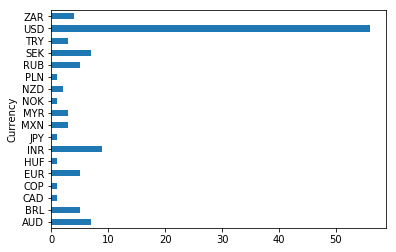

In [21]:
df_greenbonds_revised[['Currency', 'USD Equivalent']].groupby(['Currency']).size().plot(kind='barh');